1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [1]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()
x = my_data.data
y = my_data.target

2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

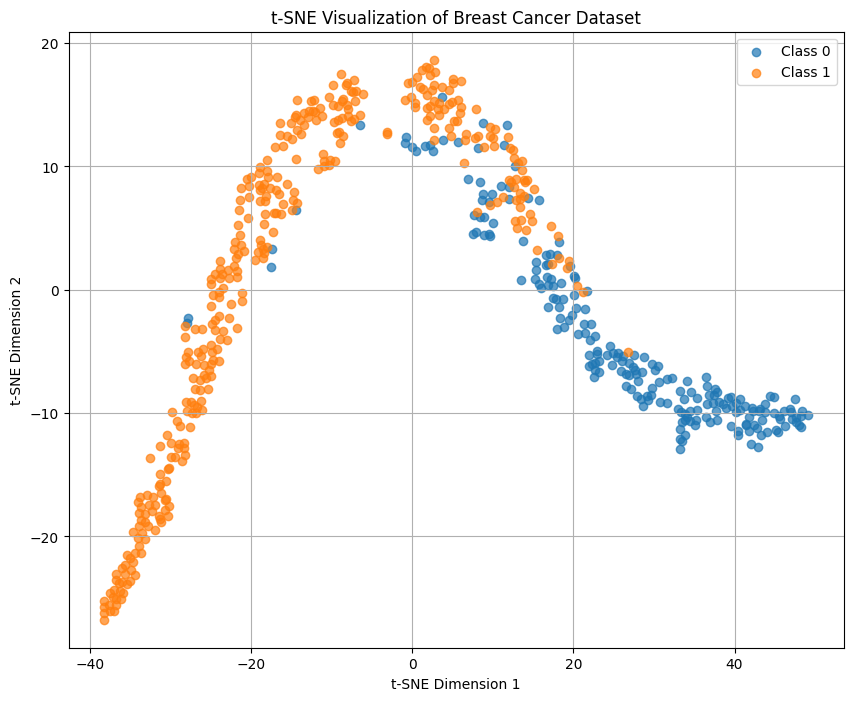

In [2]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_data_with_tsne(X, y):
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    df = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'Label': y
    })

    plt.figure(figsize=(10, 8))
    for label in df['Label'].unique():
        subset = df[df['Label'] == label]
        plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f"Class {label}", alpha=0.7)
    plt.title("t-SNE Visualization of Breast Cancer Dataset")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend()
    plt.grid()
    plt.show()

visualize_data_with_tsne(x, y)

3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [3]:

from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(...)

X_train, X_test, Y_train, Y_test = train_test_split(my_data.data, my_data.target,
                                                    test_size=0.3, random_state=42)



4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [6]:
from sklearn.tree import DecisionTreeClassifier

# model_decision_tree = DecisionTreeClassifier(...)
# model_decision_tree.fit(...)

model_decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=4, min_samples_leaf=2)
model_decision_tree.fit(X_train, Y_train)
y_pred_tree = model_decision_tree.predict(X_test)


5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [15]:
from sklearn.ensemble import RandomForestClassifier

# model_random_forest = RandomForestClassifier(...)
# model_random_forest.fit(...)

model_random_forest = RandomForestClassifier(n_estimators=200, max_features="sqrt", min_samples_split=2, min_samples_leaf=1)
model_random_forest.fit(X_train, Y_train)
y_pred_rf = model_random_forest.predict(X_test)


6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [25]:
from sklearn.ensemble import AdaBoostClassifier

# model_adaboost = AdaBoostClassifier(...)
# model_adaboost.fit(...)

model_adaboost = AdaBoostClassifier(n_estimators=200, learning_rate=0.5)
model_adaboost.fit(X_train, Y_train)
y_pred_adaboost = model_adaboost.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Evaluate model_decision_tree:

accuracy_tree = accuracy_score(Y_test, y_pred_tree) * 100
precision_tree = precision_score(Y_test, y_pred_tree) * 100
recall_tree = recall_score(Y_test, y_pred_tree) * 100
f1_tree = f1_score(Y_test, y_pred_tree) * 100
confusion_tree = confusion_matrix(Y_test, y_pred_tree)

print("Decision Tree Results:")
print("-------------------")
print(f"Accuracy: {accuracy_tree:.2f}%")
print(f"Precision: {precision_tree:.2f}%")
print(f"Recall: {recall_tree:.2f}%")
print(f"F1 Score: {f1_tree:.2f}%")
print(f"Confusion Matrix:\n{confusion_tree}\n")



# Evaluate model_random_forest:

accuracy_rf = accuracy_score(Y_test, y_pred_rf) * 100
precision_rf = precision_score(Y_test, y_pred_rf) * 100
recall_rf = recall_score(Y_test, y_pred_rf) * 100
f1_rf = f1_score(Y_test, y_pred_rf) * 100
confusion_rf = confusion_matrix(Y_test, y_pred_rf)

print("Random Forest Results:")
print("-------------------")
print(f"Accuracy: {accuracy_rf:.2f}%")
print(f"Precision: {precision_rf:.2f}%")
print(f"Recall: {recall_rf:.2f}%")
print(f"F1 Score: {f1_rf:.2f}%")
print(f"Confusion Matrix:\n{confusion_rf}\n")



# Evaluate model_adaboost:

accuracy_adaboost = accuracy_score(Y_test, y_pred_adaboost) * 100
precision_adaboost = precision_score(Y_test, y_pred_adaboost) * 100
recall_adaboost = recall_score(Y_test, y_pred_adaboost) * 100
f1_adaboost = f1_score(Y_test, y_pred_adaboost) * 100
confusion_adaboost = confusion_matrix(Y_test, y_pred_adaboost)


print("AdaBoost Results:")
print("-------------------")
print(f"Accuracy: {accuracy_adaboost:.2f}%")
print(f"Precision: {precision_adaboost:.2f}%")
print(f"Recall: {recall_adaboost:.2f}%")
print(f"F1 Score: {f1_adaboost:.2f}%")
print(f"Confusion Matrix:\n{confusion_adaboost}\n")


Decision Tree Results:
-------------------
Accuracy: 95.91%
Precision: 98.10%
Recall: 95.37%
F1 Score: 96.71%
Confusion Matrix:
[[ 61   2]
 [  5 103]]

Random Forest Results:
-------------------
Accuracy: 97.08%
Precision: 96.40%
Recall: 99.07%
F1 Score: 97.72%
Confusion Matrix:
[[ 59   4]
 [  1 107]]

AdaBoost Results:
-------------------
Accuracy: 97.08%
Precision: 99.05%
Recall: 96.30%
F1 Score: 97.65%
Confusion Matrix:
[[ 62   1]
 [  4 104]]

